# Goal:
Given a particular timeframe of a stock chart, return previous timeframes where the stock has had (visually) similar price action.

# Method:
1. Get the stock chart data for a wide timeframe (e.g. 20 years)
2. Select a particular timeframe (e.g. 1 year)
3. Search for previous timeframes where the stock has had similar price action
    1. Measure the similarity of the other timeframe(s) to the selected timeframe, using KL divergence.
    2. If the KL divergence is within a certain threshold, then the timeframes are similar and should be returned.
    3. Now divide the remaining timeframe into smaller timeframes.
    4. For each smaller timeframe, make several copies, stretching and shrinking the y-axis before comparing to the selected timeframe.
    5. For each stretch/shrink, measure the KL divergence and repeat while KL divergence is improving.
4. Return the timeframes that are similar to the selected timeframe.


In [23]:
import pandas as pd

spy = pd.read_csv('data/SPY.csv', index_col='Date', parse_dates=True)
spy.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close   
Date                                                                     
1993-01-29   43.968750   43.968750   43.750000   43.937500   25.122339  \
1993-02-01   43.968750   44.250000   43.968750   44.250000   25.301031   
1993-02-02   44.218750   44.375000   44.125000   44.343750   25.354635   
1993-02-03   44.406250   44.843750   44.375000   44.812500   25.622641   
1993-02-04   44.968750   45.093750   44.468750   45.000000   25.729845   
...                ...         ...         ...         ...         ...   
2023-03-31  404.660004  409.700012  404.549988  409.390015  409.390015   
2023-04-03  408.850006  411.369995  408.440002  410.950012  410.950012   
2023-04-04  411.619995  411.920013  407.239990  408.670013  408.670013   
2023-04-05  407.910004  408.700012  405.880005  407.600006  407.600006   
2023-04-06  406.769989  409.480011  405.679993  409.190002  409.190002   

       

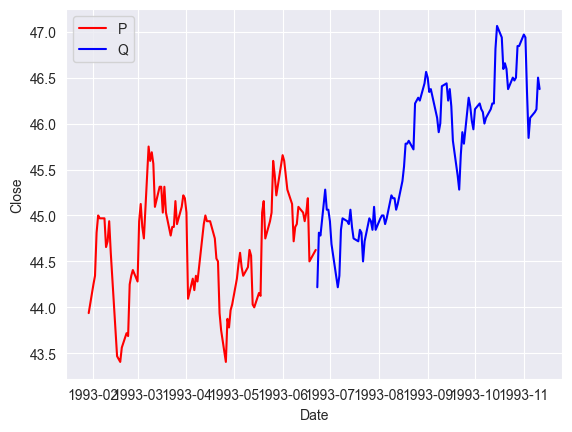

In [24]:
timeframe1 = spy.iloc[0:100]
timeframe2 = spy.iloc[100:200]
import seaborn as sns
sns.lineplot(timeframe1['Close'], label='P', color='red')
sns.lineplot(timeframe2['Close'], label='Q', color='blue')
timeframe1.reset_index(drop=True, inplace=True)
timeframe2.reset_index(drop=True, inplace=True)

Divergence: -10208599.71334869


<Axes: ylabel='Close'>

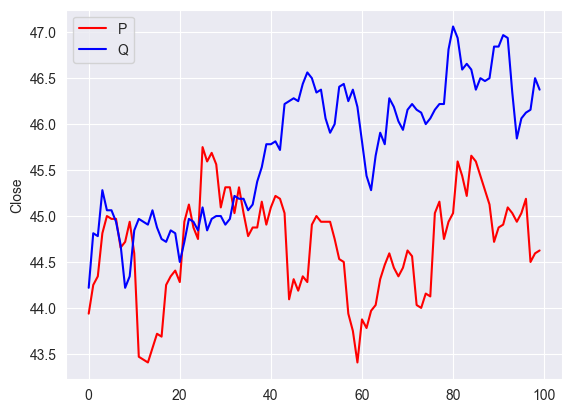

In [25]:
import numpy as np
def kl_divergence(p, q):
    return 100_000 * np.sum(np.where(p != 0, p * np.log(p / q), 0))

timeframe_divergence = kl_divergence(timeframe1['Close'], timeframe2['Close'])

print(f'Divergence: {timeframe_divergence}')
import seaborn as sns
sns.lineplot(timeframe1['Close'], label='P', color='red')
sns.lineplot(timeframe2['Close'], label='Q', color='blue')

After normalization:
        Open      High       Low     Close  Adj Close   Volume  NormCloseLin
0   43.96875  43.96875  43.75000  43.93750  25.122339  1003200      0.226667
1   43.96875  44.25000  43.96875  44.25000  25.301031   480500      0.360000
2   44.21875  44.37500  44.12500  44.34375  25.354635   201300      0.400000
3   44.40625  44.84375  44.37500  44.81250  25.622641   529400      0.600000
4   44.96875  45.09375  44.46875  45.00000  25.729845   531500      0.680000
..       ...       ...       ...       ...        ...      ...           ...
95  44.93750  45.03125  44.81250  45.03125  25.869308   330900      0.693333
96  45.12500  45.18750  45.03125  45.18750  25.959085    37400      0.760000
97  44.84375  44.84375  44.50000  44.50000  25.745304    58500      0.466667
98  44.62500  44.62500  44.53125  44.59375  25.799555    29300      0.506667
99  44.65625  44.65625  44.56250  44.62500  25.817631   137500      0.520000

[100 rows x 7 columns]
Sum of P: 54.58666666666667
Sum

/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/1992382783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe1['NormCloseLin'] = normalize_linear(timeframe1['Close'])
/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/1992382783.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe2['NormCloseLin'] = normalize_linear(timeframe2['Close'])
/Users/peterv/PycharmProjects/DejaVu/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide 

<Axes: ylabel='NormCloseLin'>

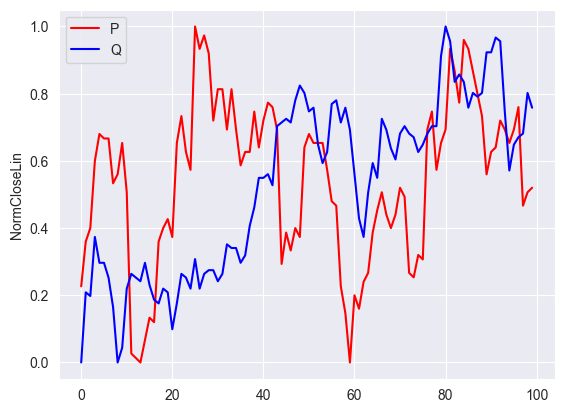

In [26]:
def normalize_linear(data):
    return (data - data.min()) / (data.max() - data.min())

# linearly normalize the data
timeframe1['NormCloseLin'] = normalize_linear(timeframe1['Close'])
timeframe2['NormCloseLin'] = normalize_linear(timeframe2['Close'])

print("After normalization:")
print(timeframe1)
print(f'Sum of P: {timeframe1["NormCloseLin"].sum()}')
print(f'Sum of Q: {timeframe2["NormCloseLin"].sum()}')
print(f'Divergence: {kl_divergence(timeframe1["NormCloseLin"], timeframe2["NormCloseLin"])}')
sns.lineplot(timeframe1['NormCloseLin'], label='P', color='red')
sns.lineplot(timeframe2['NormCloseLin'], label='Q', color='blue')

Sum of P: 2.8970001069542413
Sum of Q: 3.3395432163973817
Divergence: inf


/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/2779710006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe1['NormCloseLog'] = normalize_log(timeframe1.Close)
/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/2779710006.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe2['NormCloseLog'] = normalize_log(timeframe2.Close)
/Users/peterv/PycharmProjects/DejaVu/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero enco

<Axes: ylabel='NormCloseLog'>

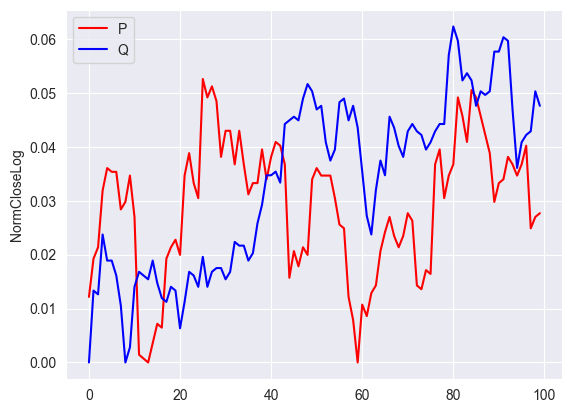

In [27]:
def normalize_log(data):
    return np.log(data) - np.log(data.min())

# log normalize the data
timeframe1['NormCloseLog'] = normalize_log(timeframe1.Close)
timeframe2['NormCloseLog'] = normalize_log(timeframe2.Close)

print(f'Sum of P: {timeframe1["NormCloseLog"].sum()}')
print(f'Sum of Q: {timeframe2["NormCloseLog"].sum()}')
print(f'Divergence: {kl_divergence(timeframe1["NormCloseLog"], timeframe2["NormCloseLog"])}')
sns.lineplot(timeframe1['NormCloseLog'], label='P', color='red')
sns.lineplot(timeframe2['NormCloseLog'], label='Q', color='blue')


Sum of P: 1.0
Sum of Q: 0.9999999999999999
Divergence: 17.5292227807011


/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/3852439095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe1['NormClose'] = normalize(timeframe1['Close'])
/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/3852439095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeframe2['NormClose'] = normalize(timeframe2['Close'])


<Axes: ylabel='NormClose'>

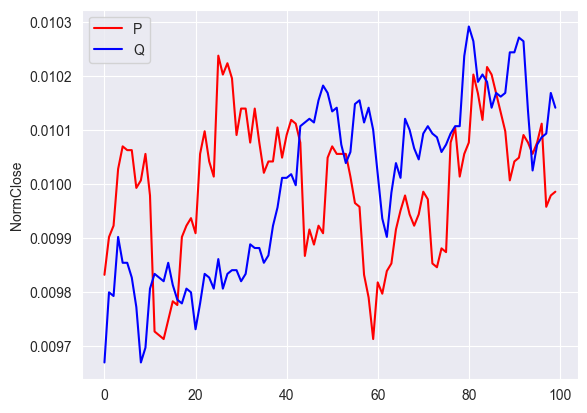

In [28]:
def normalize(data):
    return data / data.sum()

# log normalize the data
timeframe1['NormClose'] = normalize(timeframe1['Close'])
timeframe2['NormClose'] = normalize(timeframe2['Close'])

print(f'Sum of P: {timeframe1["NormClose"].sum()}')
print(f'Sum of Q: {timeframe2["NormClose"].sum()}')
print(f'Divergence: {kl_divergence(timeframe1["NormClose"], timeframe2["NormClose"])}')
sns.lineplot(timeframe1['NormClose'], label='P', color='red')
sns.lineplot(timeframe2['NormClose'], label='Q', color='blue')



Searching with base period: 1993-01-29 00:00:00 to 1993-04-26 00:00:00
Minimum divergence: 7.55
Found in period: 2012-08-09 00:00:00 to 2012-11-05 00:00:00


/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/4204569937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period['NormClose'] = normalize(period.loc[:, 'Close'])
/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/4204569937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period['NormClose'] = normalize(period.loc[:, 'Close'])
/var/folders/xf/567qp9zn26n9zcdk56tbpr0c0000gn/T/ipykernel_3710/4204569937.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of

<Axes: ylabel='NormClose'>

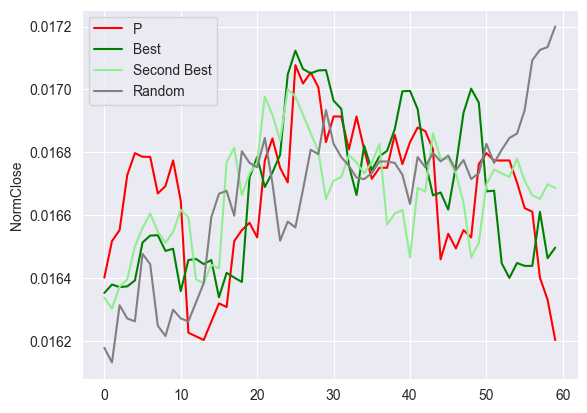

In [29]:
duration = 60
all_periods = [spy.iloc[i:i+duration] for i in range(0, spy.shape[0], duration)]
all_periods.pop()

for period in all_periods:
    period.reset_index(inplace=True)
    period['NormClose'] = normalize(period.loc[:, 'Close'])

timeframe1 = all_periods[0]
other_periods = all_periods[1:]

print(f'Searching with base period: {timeframe1.Date.min()} to {timeframe1.Date.max()}')

minimum_divergence = 1000000
minimum_divergence_period = pd.DataFrame()
minimum_divergence_group = list()
for period in other_periods:
    divergence = kl_divergence(timeframe1['NormClose'], period['NormClose'])
    if divergence < minimum_divergence:
        minimum_divergence = divergence
        minimum_divergence_period = period
        minimum_divergence_group.append((divergence, period))
        minimum_divergence_group = sorted(minimum_divergence_group)
        if len(minimum_divergence_group) > 5:
            minimum_divergence_group.pop()

import random
random_selection = random.choice(other_periods)

print(f'Minimum divergence: {minimum_divergence:.2f}\n'
      f'Found in period: {minimum_divergence_period.Date.min()} to {minimum_divergence_period.Date.max()}')
timeframe1.reset_index(drop=True, inplace=True)
timeframe2.reset_index(drop=True, inplace=True)

sns.lineplot(timeframe1['NormClose'], label='P', color='red')
sns.lineplot(minimum_divergence_period['NormClose'], label='Best', color='green')
sns.lineplot(minimum_divergence_group[1][1]['NormClose'], label='Second Best', color='lightgreen')
sns.lineplot(random_selection['NormClose'], label='Random', color='grey')